## INTRODUCTION

Customer Segmentation is the subdivision of a market into discrete customer groups that share similar characteristics. Customer Segmentation can be a powerful means to identify unsatisfied customer needs. Using data gathered through membership cards from a supermarket mall we aim to understand target customers so that the findings can be given to marketing team to plan strategically accordingly.

## ABOUT DATASET

ID :Shows a unique identificator of a customer.
    
Sex: Biological sex (gender) of a customer. In this dataset there are only 2 different options.0= male,1= female

Marital Staus: Marital status of a customer.0=single,1=non-single (divorced / separated / married / widowed)

Age: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset

Education:Level of education of the customer. 0=Other / unknowN,1=High school,2=university,3=graduate school

Income: Self-reported annual income in US dollars of the customer
    
Occupation of the customer: 0 = unemployed / unskilled,1 = skilled employee / official,2 = management / self-employed / highly qualified employee / officer


Settlement size: The size of the city that the customer lives in. 0 = Small city, 1= mid-sized city,2 =big city









## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading The Data

In [2]:

df=pd.read_csv('segmentation data.csv')
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [4]:
##checking for null values
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [5]:
#checking for the shape(no.of rows and columns) of the dataset
df.shape

(2000, 8)

In [6]:
#checking for duplicate values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [7]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

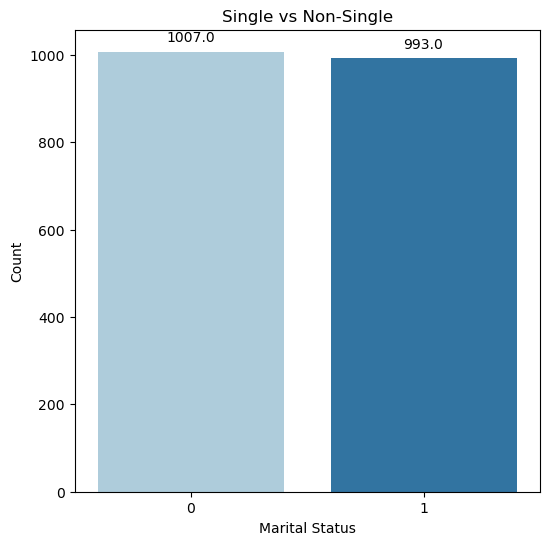

In [8]:
df['Marital status'].value_counts()
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='Marital status', data=df, palette='Paired')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Single vs Non-Single')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


From this chart, we can confirm the number of single customers represented as '0' is higher than non-single customers represented as '1'

## Gender Ratio

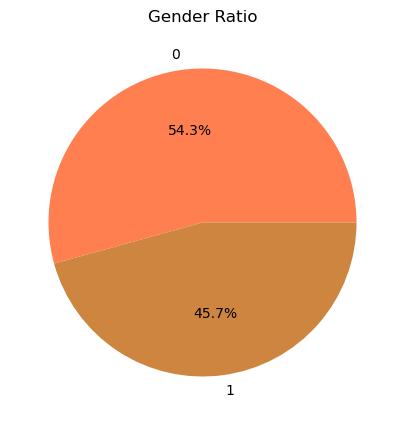

In [9]:
df['Sex']
sex_dist = df['Sex'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(sex_dist.values, labels=['0', '1'], colors=['coral', 'peru'], autopct='%1.1f%%')
plt.title('Gender Ratio')
plt.show()



Male customer as represented as '0' in the chart above have a higher ratio of by 54.3%  whilst the females represented as 1 have a ratio of 45.7% indicating the company has more male customers as compared to female customers

## Educational Level vs Occupation

In [10]:
##mapping the names of education to the numbers they are represented by in the column
education_mapping = {0: 'Other/Unknown',1: 'High School', 2: 'University', 3: 'Graduate School'}
df['Education'] = df['Education'].replace(education_mapping)
print(df['Education'].value_counts())


Education
High School        1386
University          291
Other/Unknown       287
Graduate School      36
Name: count, dtype: int64


In [11]:
# Reverse mapping
education_mapping = {'Other/Unknown': 0, 'High School': 1, 'University': 2, 'Graduate School': 3}
df['Education'] = df['Education'].replace(education_mapping)


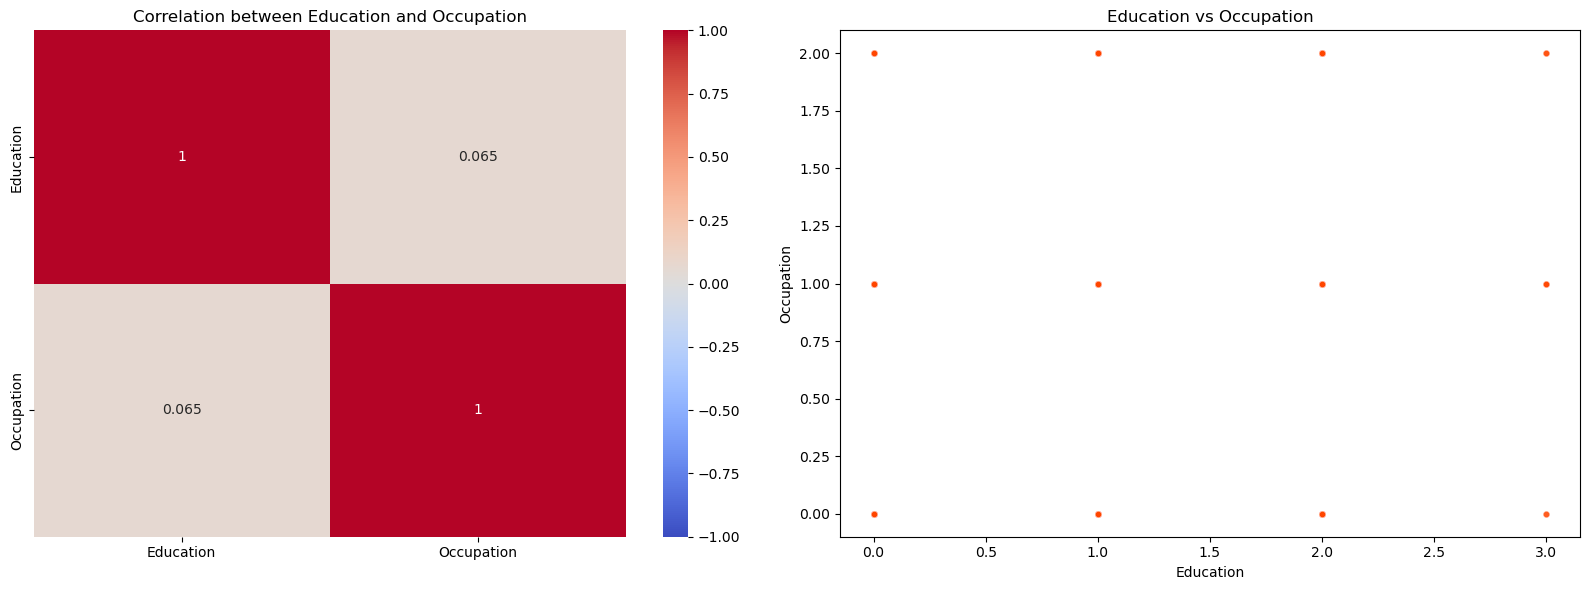

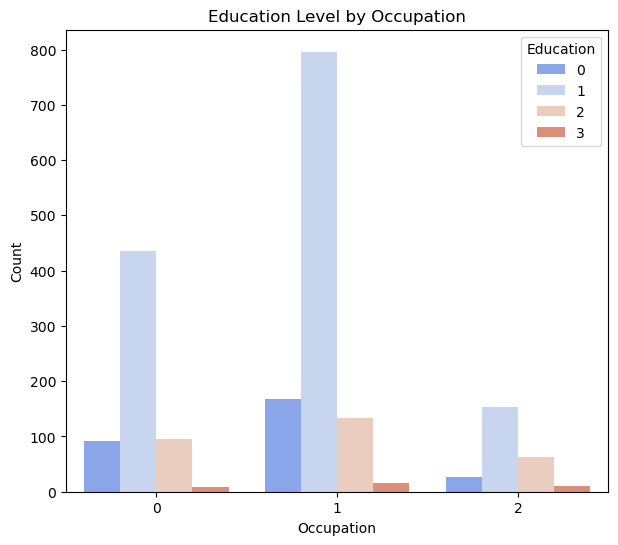

In [33]:

# Correlation Matrix
correlation_matrix = df[['Education', 'Occupation']].corr()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap for Correlation Matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title('Correlation between Education and Occupation')

# Scatter Plot
sns.scatterplot(x='Education', y='Occupation', data=df, color='orangered', s=20, alpha=0.2, ax=axes[1])
axes[1].set_title('Education vs Occupation')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Occupation')
plt.tight_layout()

# Countplot
plt.figure(figsize=(7, 6))
ax = sns.countplot(x='Occupation', hue='Education', data=df, palette='coolwarm')
plt.title('Education Level by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


 Notably accross all occupations, high school education is prevalent among customers. Also skilled customers dominate the customer base but there is a need for more data collection to clarify the educational background of the customers with unknown education backgrounds.However, we can see also see that there's little to no linear correlation between education and occupation suggesting that one's education doesn't not really have an effect on their occupation


## Correlation Between Income And Settlement Size

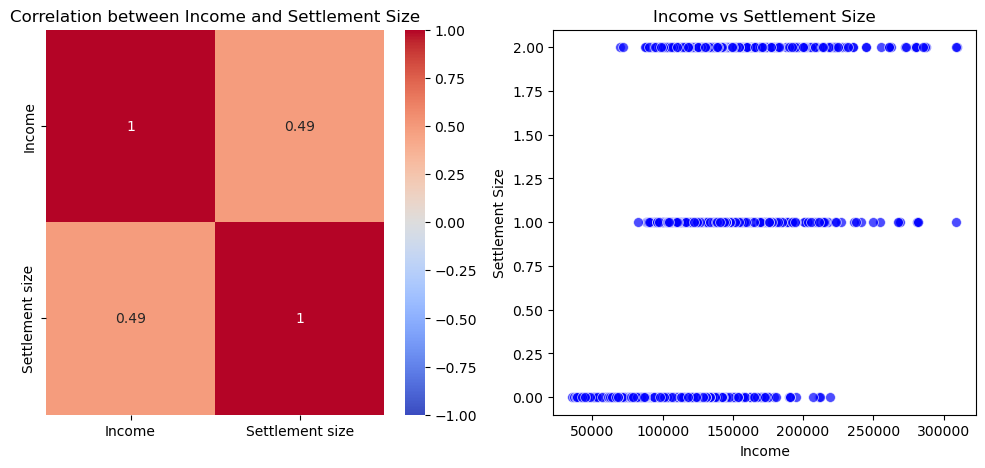

In [13]:

# Correlation Matrix
correlation_matrix = df[['Income', 'Settlement size']].corr()

# Heatmap
plt.figure(figsize=(12, 5))

# Heatmap for Correlation Matrix
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Income and Settlement Size')

# Scatter Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x='Income', y='Settlement size', data=df, color='blue', s=50, alpha=0.7)
plt.title('Income vs Settlement Size')
plt.xlabel('Income')
plt.ylabel('Settlement Size')
plt.show()


The analysis indicates a moderate positive correlation (r = 0.49) between settlement size and income, highlighting a discernible relationship. Notably, customers residing in big cities consistently demonstrate higher incomes in comparison to individuals in other settlement types, underscoring the potential influence of settlement size on income levels.

## Settlement Size By Age Groups /Settlement By Marital Status

In [14]:
##grouping of ages
Agebins = [18, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77]
Agelabels = ['18-22', '23-27', '28-32', '33-37', '38-42', '43-47', '48-52','53-57','58-62','63-67','68-72','73-77']
df['Age_Group'] = pd.cut(df['Age'], bins=Agebins, labels=Agelabels, right=False)

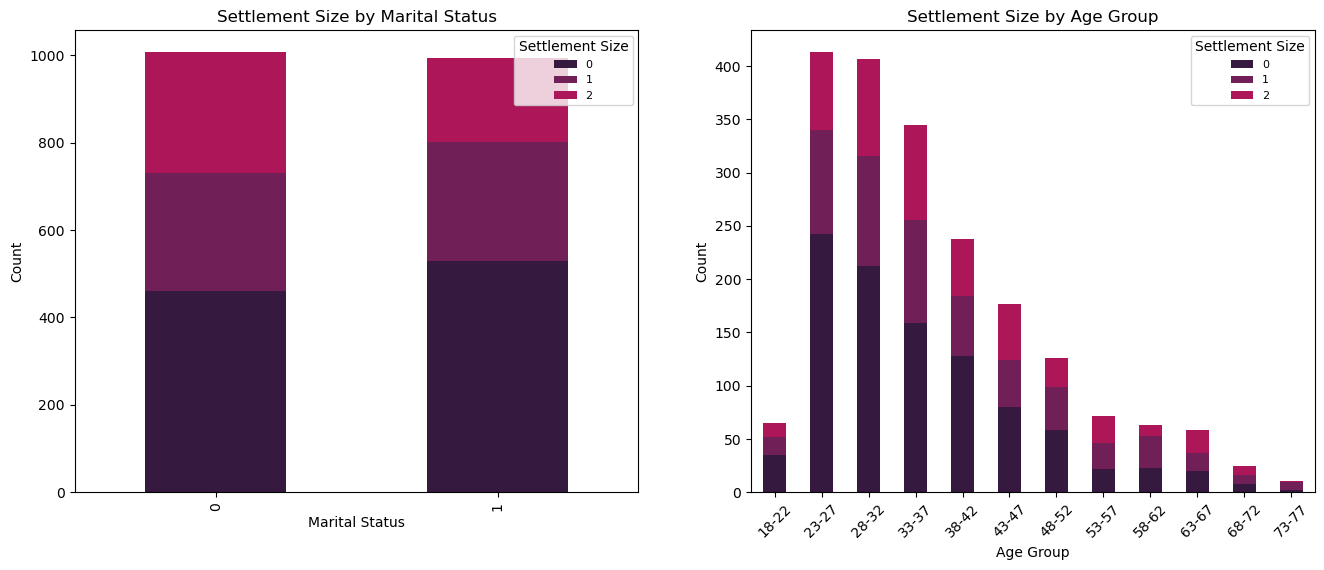

In [15]:
custom_palette = sns.color_palette("rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Subplot 1: Settlement Size by Marital Status
pivot_df_marital = df.pivot_table(index='Marital status', columns='Settlement size', aggfunc='size', fill_value=0)
ax1 = pivot_df_marital.plot(kind='bar', stacked=True, ax=axes[0], color=custom_palette)
axes[0].set_title('Settlement Size by Marital Status')
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Count')
handles, labels = ax1.get_legend_handles_labels()
axes[0].legend(handles=handles, labels=labels, title='Settlement Size', loc='upper right', bbox_to_anchor=(1.00, 1), prop={'size': 8})

# Subplot 2: Settlement Size by Age Group
pivot_df_age = df.pivot_table(index='Age_Group', columns='Settlement size', aggfunc='size', fill_value=0)
ax2 = pivot_df_age.plot(kind='bar', stacked=True, ax=axes[1], color=custom_palette)
axes[1].set_title('Settlement Size by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Count')
handles, labels = ax2.get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, title='Settlement Size', loc='upper right', bbox_to_anchor=(1.00, 1), prop={'size': 8})
axes[1].tick_params(axis='x', rotation=45)
plt.show()



From these charts we can observe that customers between age 23-27 represent a significant portion of the customer base, it can also be observed that non-single customers are predominant within this age group and prefer settling in the smaller cities.Notably,customer base tends to decrease as age increases,this suggests that target group are mostly young. The markerting team can develop strategies to promote products or service that align with people who fall in the 'young customer base' and those living in smaller cities.Also  they personalize products/ services to attract customers living in other cities and those that fall outside the predominant ages.






## AVERAGE INCOME VS EDUCATION / AVERAGE INCOME VS OCCUPATION

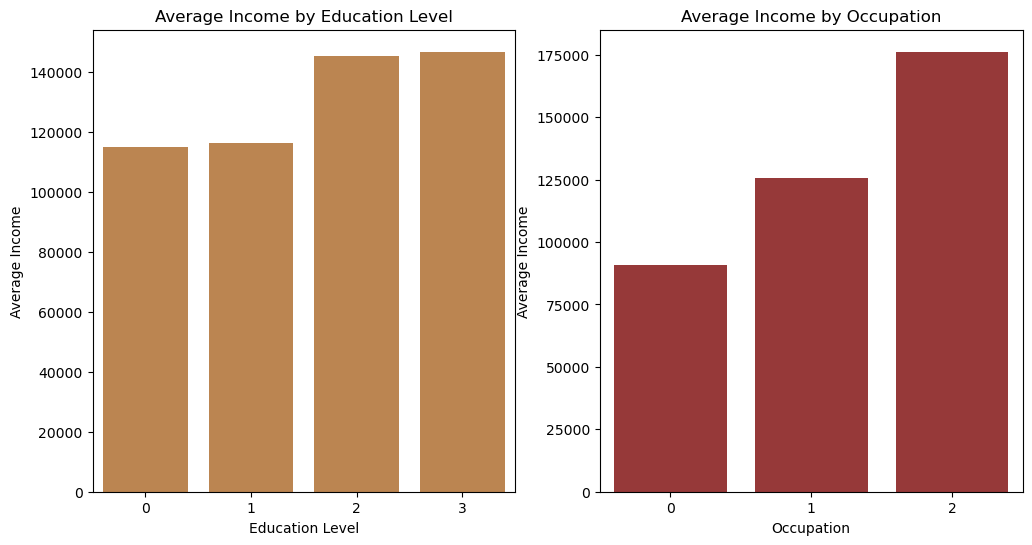

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot 1: Average Income by Education Level
income_by_education = df.groupby('Education')['Income'].mean().sort_values(ascending=False)
sns.barplot(x=income_by_education.index, y=income_by_education.values, color='peru', ax=axes[0])
axes[0].set_title('Average Income by Education Level')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Average Income')


# Subplot 2: Average Income by Occupation
income_by_occupation = df.groupby('Occupation')['Income'].mean().sort_values(ascending=False)
sns.barplot(x=income_by_occupation.index, y=income_by_occupation.values, color='brown', ax=axes[1])
axes[1].set_title('Average Income by Occupation')
axes[1].set_xlabel('Occupation')
axes[1].set_ylabel('Average Income')
plt.show()


 


 Individuals with higher levels of education, particularly those in graduate school tend to exhibit elevated income levels. This finding underscores the positive correlation between educational achievement and income, highlighting the significance of educational attainment as a potential driver of financial success among the analyzed demographic. The analysis reveals a noteworthy trend among customers categorized as 2(management/self-employed/highly qualified employee/officer)indicating that this occupational group exhibits the highest average income. This insight suggests a potential correlation between specific professional roles and increased earning potential within the studied customer dataset. 


## AGE VS INCOME / AVERAGE INCOME VS MARITAL STATUS

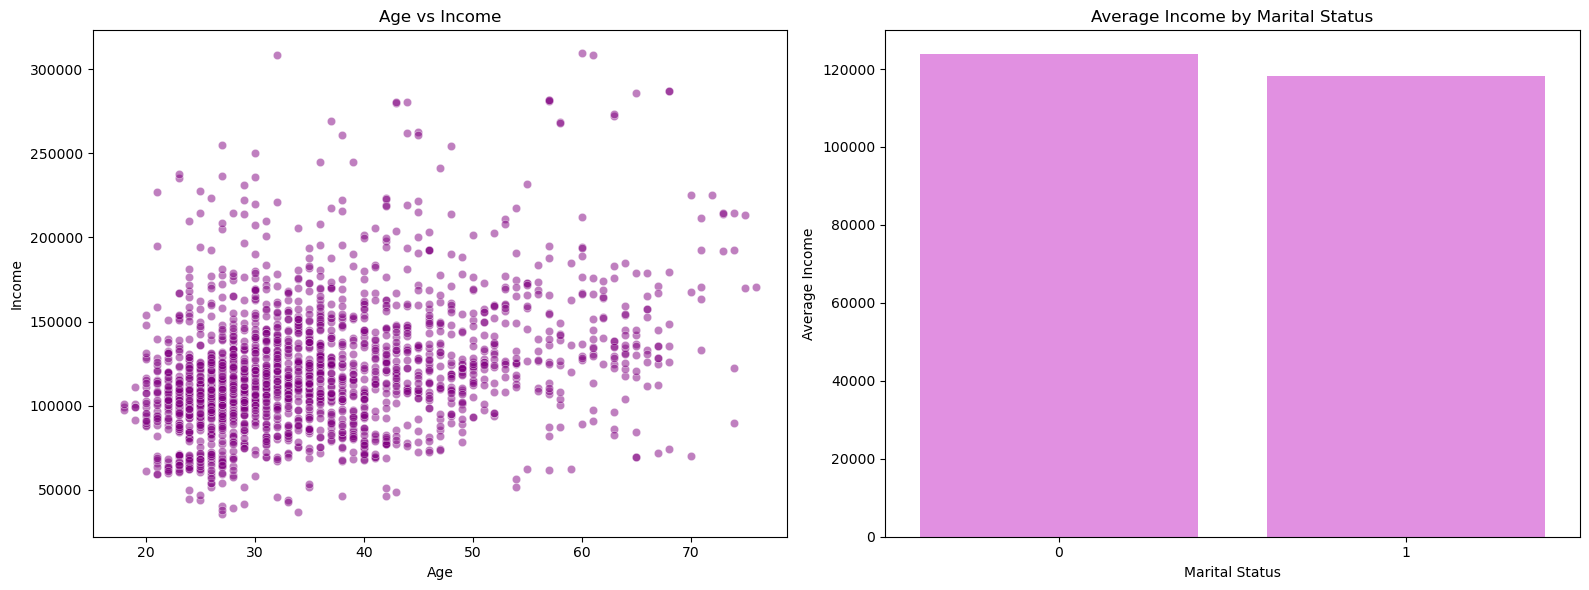

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Scatter plot : Age vs Income
sns.scatterplot(x='Age', y='Income', data=df, color='purple', alpha=0.5, ax=axes[0])
axes[0].set_title('Age vs Income')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Income')

# Bar plot : Average Income by Marital Status
df['Age_Group'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70, 80, 90], labels=['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90'])
average_income_by_age_group = df.groupby('Age_Group')['Income'].mean()

income_by_marital_status = df.groupby('Marital status')['Income'].mean().sort_values(ascending=False)
sns.barplot(x=income_by_marital_status.index, y=income_by_marital_status.values, color='violet', ax=axes[1])
axes[1].set_title('Average Income by Marital Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Average Income')
plt.tight_layout()
plt.show()


There is a generally increasing trend in average income with age, with the average income gradually rising from the '18-30' age group to the '71-80' age group.This suggests that, on average, older customers tend to have higher incomes in the provided dataset. Furthermore, an interesting observation emerges regarding marital status. The data suggests that single customers, on average, make the highest income among the analyzed groups. This finding may be attributed to various factors, such as career focus or differences in spending and saving patterns.

## SUMMARY

The analysis provides valuable insights into the customer segmentation dataset shedding light on various demographic factors and their correlations. Key findings include the dominance of single customers, a higher ratio of male customers, prevalence of high school education across occupations, and the positive correlation between educational attainment and income. Additionally, the dataset reveals an increasing trend in average income with age, with single customers and those in the 'management/self-employed/highly qualified employee/officer' category exhibiting higher incomes.

## RECCOMENDATIONS

Targeting Strategies: The marketing team can capitalize on the predominant customer base of single individuals by tailoring marketing strategies to meet the preferences and needs of this demographic,leveraging the higher ratio of male customers by developing targeted campaigns that resonate with male consumer preferences can be considered. 

Product/Service Customization:
The prevalence of high school education across various occupations should be recognized, offering products/services that align with the preferences and lifestyles of this educational group can be considered.Also the team can explore opportunities to customize offerings for customers with unknown educational backgrounds through targeted surveys or data collection efforts.

Settlement-Based Marketing:
Acknowledge the moderate positive correlation between settlement size and income. Focus marketing efforts on customers residing in larger cities, as they tend to demonstrate higher incomes.
Develop personalized campaigns for customers in smaller cities to enhance engagement and cater to their specific needs.

Age-Targeted Strategies:
Develop marketing strategies that align with the significant portion of the customer base in the age group of 23-27. Consider products or services that appeal to this age group's preferences.
Recognize the decreasing trend in the customer base with increasing age. The marketing team should explore ways to engage and retain older customers through targeted promotions and loyalty programs.

Educational Achievement as a Differentiator: Develop campaigns that resonate with well-educated individuals, emphasizing the potential financial benefits of your products/services.
Tailor marketing messages for the 'management/self-employed/highly qualified employee/officer' category, acknowledging their higher average income. Consider exclusive offers or services tailored to this occupational group.



In conclusion, targeted outreach programs for demographics with lower numbers can be implemented. Marketing messages could be tailored to address their specific needs and preferences, aiming to increase their engagement with your products or services.






